In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale as std_scale, robust_scale

from scipy.signal import find_peaks, find_peaks_cwt, peak_widths

import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import smooth, despike, utils

# %matplotlib widget

In [2]:
def load_data(root):
    import os
    median = np.median
    d = {}
    for fold in os.listdir(root):

        if '191' in fold:
            key = 'SA_191'
        if '606' in fold:
            key = 'SA_606'

        Xs, Ys = io.load_txt_dir(f"{root}/{fold}", start_index=42)

        for ys in Ys:
            for y in ys:
                y[:] -= y.min()
                y[:] /= 100.
        
        # for ys in Ys:
        #     utils.mark_outliers_modified_zscore2(ys, tau=3.0)

        d[key] = (Xs, Ys)
            
    return d

d = load_data("data/Table")

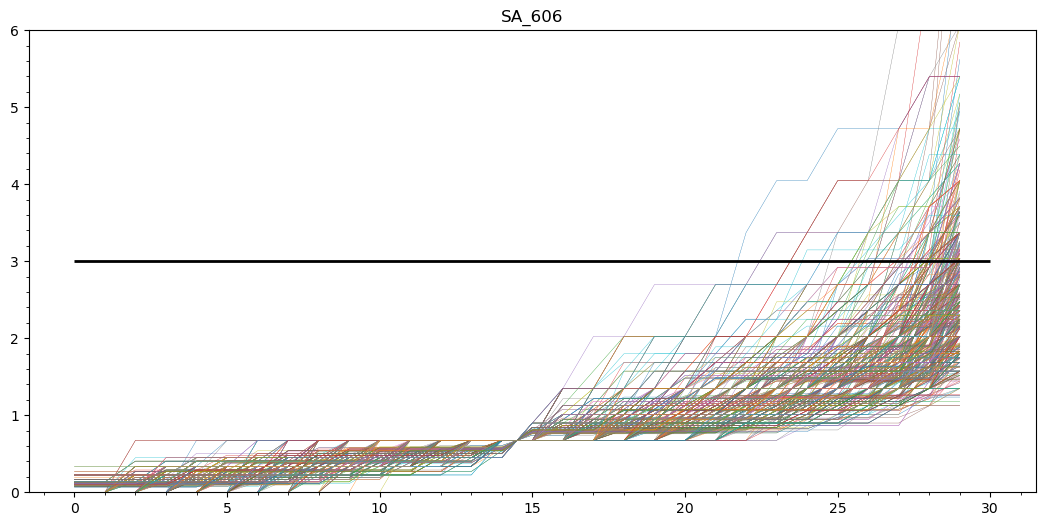

/home/intellimath/.local/lib/python3.11/site-packages/irsa-0.0-py3.11.egg/irsa/preprocess/utils.py:28: RuntimeWarning: divide by zero encountered in divide
/home/intellimath/.local/lib/python3.11/site-packages/irsa-0.0-py3.11.egg/irsa/preprocess/utils.py:28: RuntimeWarning: invalid value encountered in divide


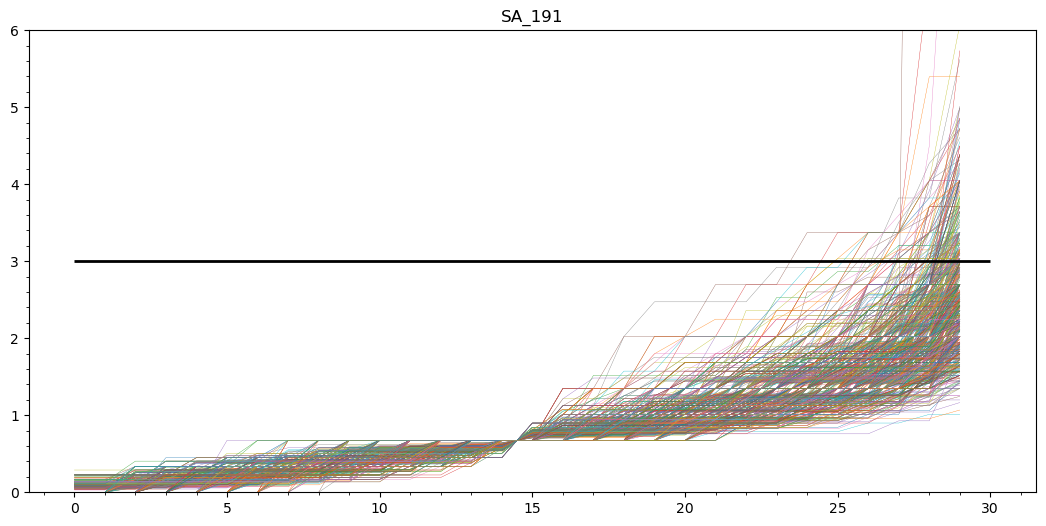

In [3]:
ri = random.randrange(60)
for i, key in enumerate(d):
    Xs, Ys = d[key]
    ys = Ys[ri]
    plt.figure(figsize=(13,6))
    plt.title(key)
    zs = utils.modified_zscore2(ys)
    for zz in zs.T:
        plt.plot(sorted(abs(zz)), linewidth=0.25)
    plt.hlines(3, 0, 30, color='k', linewidth=2.0)
    plt.minorticks_on()
    plt.ylim(0, 6)
    plt.show()
    

In [4]:
for i, key in enumerate(d):
    Xs, Ys = d[key]
    for ys in Ys:
        zs = utils.modified_zscore2(ys)
        utils.mark_outliers(ys, zs, tau=3.0)

    d[key] = (Xs, Ys)


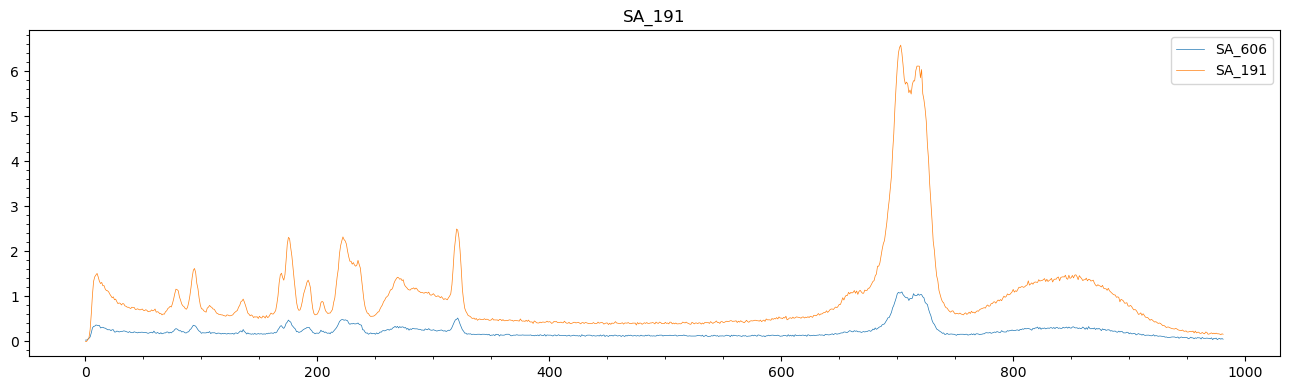

In [5]:
M, m, m0 = 700, 10, 5
plt.figure(figsize=(13,4))
for i, key in enumerate(d):
    Xs, Ys = d[key]

    plt.title(key)
    ys = Ys[ri]
    plt.plot(np.nanmedian(ys, axis=0), linewidth=0.5, label=key)
        
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.show()


In [22]:
# for i, key in enumerate(d):
#     Xs, Ys = d[key]

#     plt.title(key)
#     for xs in Xs:
#         plt.plot(xs, linewidth=0.5)
        
# plt.minorticks_on()
# plt.tight_layout()
# # plt.legend()
# plt.show()

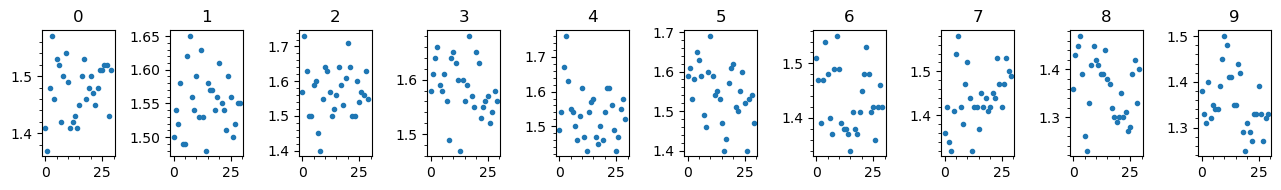

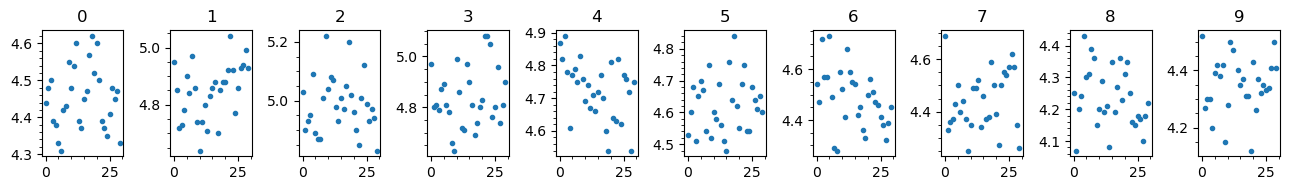

In [4]:
for i, key in enumerate(d):
    Xs, Ys = d[key]

    plt.figure(figsize=(13,2))
    ys = Ys[ri]
    for i in range(m):
        plt.subplot(1,m,i+1)
        plt.title(str(i))
        plt.plot(ys[:,M+i], marker='o', markersize=3, linewidth=0)
        
        plt.minorticks_on()
        # plt.yticks([])
    plt.tight_layout()
    plt.show()


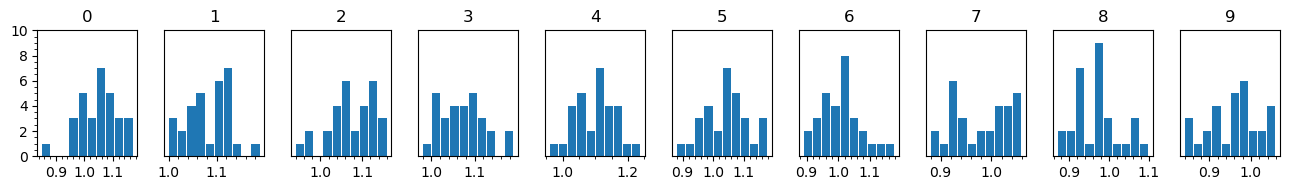

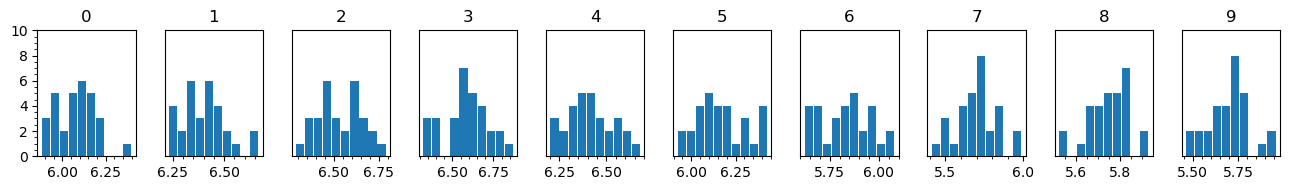

In [6]:
for i, key in enumerate(d):
    Xs, Ys = d[key]

    plt.figure(figsize=(13,2))
    ys = Ys[ri]
    for i in range(m):
        plt.subplot(1,m,i+1)
        plt.title(str(i))
        plt.hist(ys[:,M+i], rwidth=0.9, bins=10)

        if i:
            plt.yticks([])
        else:
            plt.yticks(range(0,11,2))
        # plt.xticks([])
        plt.minorticks_on()
        plt.ylim(0,10)
    plt.tight_layout()
    plt.show()

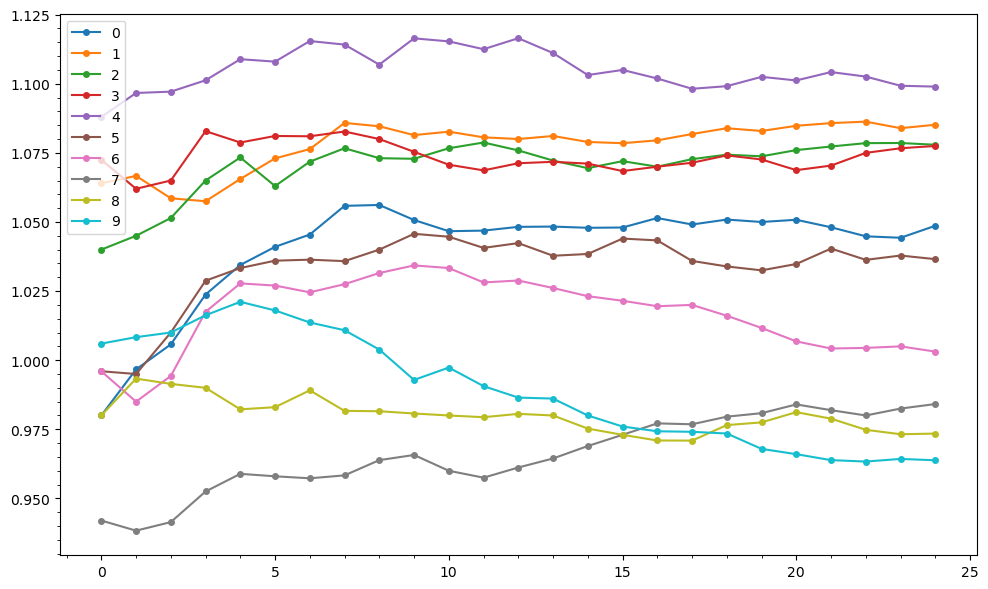

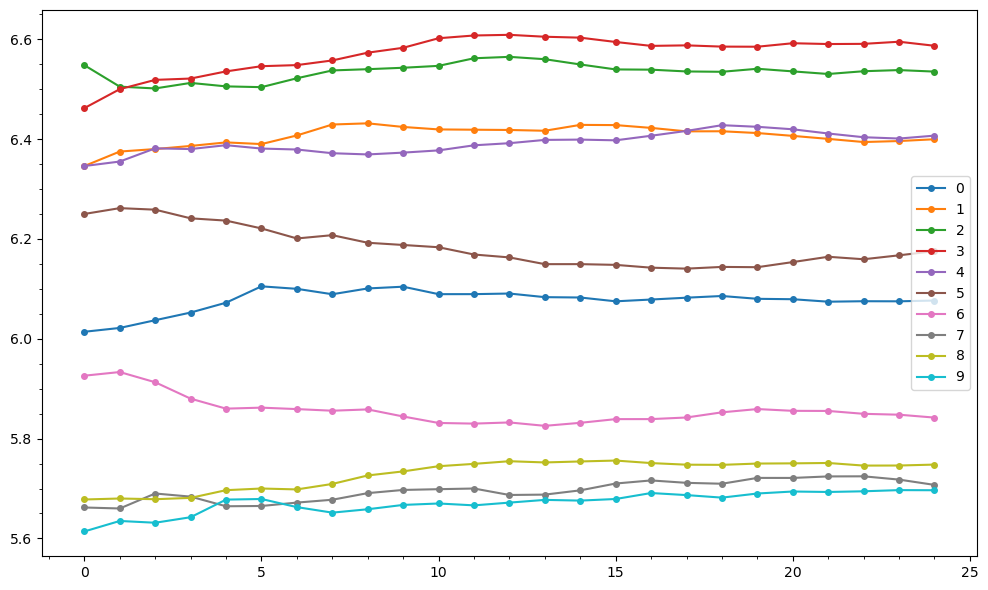

In [7]:
for i, key in enumerate(d):
    Xs, Ys = d[key]

    plt.figure(figsize=(10,6))
    ys = Ys[ri]
    for ii in range(m):
        yi = ys[:,M+ii]
        yis = []
        for j in range(m0,len(yi)):
            # yij = np.array(yi[:j])
            yis.append(np.nanmean(yi[:j]))
        plt.plot(yis, marker='o', markersize=4, label=str(ii))
    plt.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

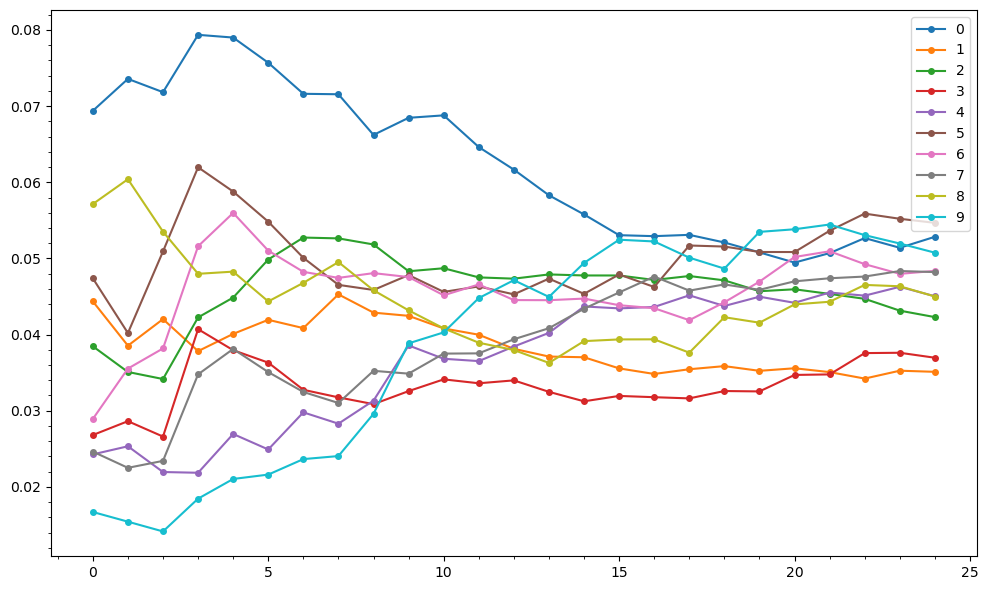

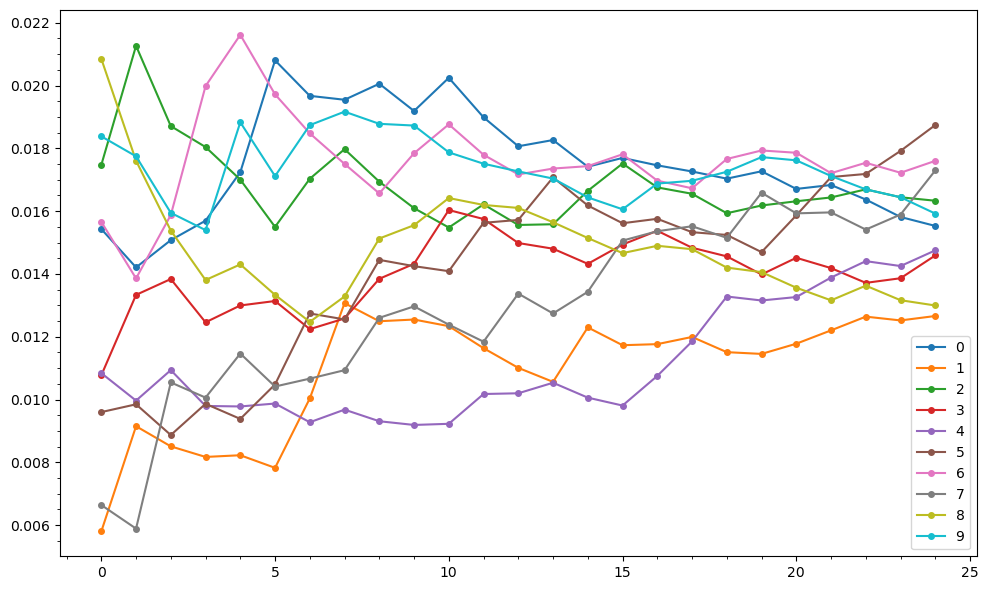

In [8]:
for i, key in enumerate(d):
    Xs, Ys = d[key]

    plt.figure(figsize=(10,6))
    ys = Ys[ri]
    for ii in range(m):
        yi = ys[:,M+ii]
        yis = []
        for j in range(m0,len(yi)):
            yij = np.array(yi[:j])
            mm = np.nanmean(yij)
            dd = np.nanmean(abs(yij - mm)) / mm
            yis.append(dd)
        plt.plot(yis, marker='o', markersize=4, label=str(ii))
    plt.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

In [9]:
#1./1.253314